<a href="https://colab.research.google.com/github/aompong/Vision-And-Deep-Learning-2025/blob/main/Vision_Assignment1_Sirapatsorn_Pongpiriyakarn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Welcome to our first IST596/696 Computer Vision Assignment!
Submission release: Feb 3

Submission deadline: Feb 11, 11.59pm

The assignment consists of 2 parts:
1. Hybrid Image
2. Colorizing RGB-filtered photographs.

Each part consists of multiple coding tasks and write-ups.

The existing code that you see is boilerplate code that you don't need to modify. The code that you need to write will be tagged with "TODO," and write-ups that you need to write will be tagged "WRITEUP."

There is a total of 5 coding TODOs and 2 WRITEUPs.

**Submission:**
1. Save a copy of this colab notebook, and directly code / write texts in your own copy.
2. Rename your colab ipynb with "Vision_Assignment1_FIRSTNAME_LASTNAME.ipynb"
3. (Optional) Go to File -> "Save a copy in Drive" to make another copy for submission. Or you can submit your current copy.
4. Share the file with supasorn@gmail.com before the deadline. No further edits are allowed after the deadline (Sept 8 @ 11.59pm).

**Academic Integrity:**
*You can explain concepts to each other, ask for help, give help. But you're not allowed to read other people's code, share your code, google for coding solutions, or using LLMs like ChatGPT to completely or partially code.   Writeups must be in your own words. No plagiarism. If ideas are taken / inspired by something, cite the source.* https://en.wikipedia.org/wiki/Academic_integrity

# Part 1

This assignment is about creating hybrid images!!

http://cvcl.mit.edu/hybrid/OlivaTorralb_Hybrid_Siggraph06.pdf

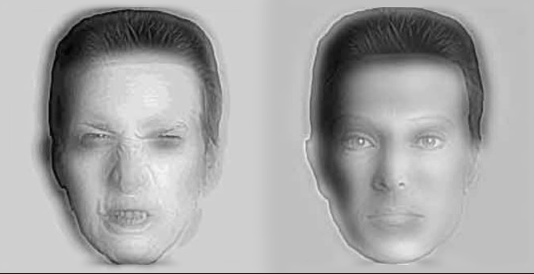

A hybrid image is an image that appears to have changed its content as we see it from farther away. In the example above, the left guy seems to be frowning whereas the right seems neutral, but as you move away from your screen (or simply squint your eyes), the expressions switch!

---

A hybrid image H can be created from any two images I1 and I2 as follows:

```
H = High(I1) + Low(I2)
```
where High() and Low() are high-pass and low-pass filters. Note that this equation is not the only way to make a hybrid image.

In this assignment, you will be implementing these two filters by implementing the convolution operation.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import os, imageio, ssl
import time
ssl._create_default_https_context = ssl._create_unverified_context

Our image is using HWC convention meaning that the first dimension is row (Height), the second dimension is column (Width), and the last dimension is color (RGB).

Python is 0-indexing, so the first element of an array is at position 0.
For example, img[0, 3, 2] is the pixel of an image "img" at the 1st row, 4th column, and blue channel.



(242, 199, 3) (242, 199, 3)


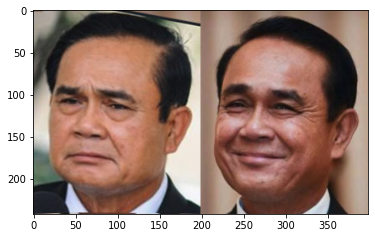

In [ ]:
img0 = imageio.imread('https://ist.vistec.ac.th/vll/supasorn/teaching/vision/proj1/too1.jpg')[..., :3] / 255.
img1 = imageio.imread('https://ist.vistec.ac.th/vll/supasorn/teaching/vision/proj1/too2.jpg')[..., :3] / 255.

print(img0.shape, img1.shape)
def join(imgs, dim=1):
  return np.concatenate(imgs, dim)

plt.imshow(join((img0, img1)))

In [ ]:
# TODO [1/5]: returns a Gaussian kernel of size (shape x shape) with sigma (unit=pixel).
# You cannot use a vision library such as opencv.
def create_gaussian_kernel(shape, sigma):
  out = np.empty((shape, shape))
  # your code
  return out


In [ ]:
# TODO [2/5]: returns a Gaussian kernel of a given sigma.
# When creating a Gaussian kernel, we sometimes want to just specify the sigma
# instead of both sigma and shape. So, what we can do is to ask the user for the
# sigma and automatically figure out the appropriate shape for our kernel.
# A good rule of thumb would be to have the kernel spans *at least* 3 sigma.
# which would cover about 99.7% of the distribution mass. The kernel size should be
# an odd number so that there's a center pixel.
def create_gaussian_kernel_from_sigma(sigma):
  #return something

kernel = create_gaussian_kernel_from_sigma(2)
plt.imshow(kernel)

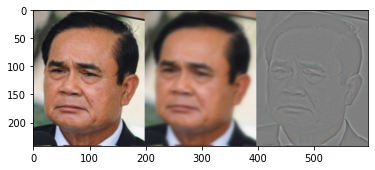

In [ ]:
# TODO [3/5]: returns img convolved with a 2D kernel.
# img is an RGB image. We will use the given 2D kernel to convolve each channel
# of img separately. The output image should have the same size as the input
# image. So, you will need to pad the input image so that the convolution on
# the border of the image operates on valid pixels. You may pad it with 0, or
# other reasonable choices. https://www.programmersought.com/article/1055103907/
def convolve(img, kernel):
  # your code


# We show a sample visualization of img0, its blurred version, and the high-pass(blurred)

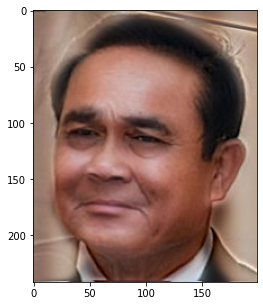

In [ ]:
# TODO [4/5]: Returns a hybrid image from img0 and img1. That is,
# Hybrid = High(img0) + Low(img1). For Lung Too, high-pass filter could be created
# by img0 - G * img0 with sigma of G of around 2, and low-pass filter with sigma
# of G around 3. Don't forget to clip the output to be in the range [0, 1].
def create_hybrid(img0, img1):
  # your code

plt.figure(figsize = (5, 5))
plt.imshow(create_hybrid(img0, img1))

**WRITEUP** [1/2]
1. Show your own hybrid image!
2. Explain the process of selecting your two images that make a good hybrid image. Are there any considerations and limitations?  How to pick good sigmas for the Gaussian blurs?

# Part 2

This part is adapted from an assignment for a computer vision class at Berkeley / UIUC / CMU. The goal is to take a stack of 3 images corresponding to RGB-filtered images that look like this:

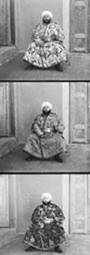

And combine them into a single color image. Here, we need to figure out how to align each channel so that the resulting color image looks aligned and correct. For this assignment, we will assume that these filtered images only differ in translation, and we only need to find the right shifting parameters.

These images were taken by a Russian man named Sergey Prokudin-Gorsky https://en.wikipedia.org/wiki/Sergey_Prokudin-Gorsky.  Some extended background can be found here https://inst.eecs.berkeley.edu/~cs194-26/fa20/hw/proj1/.


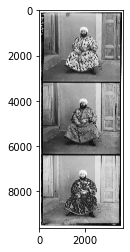

In [ ]:
# All 11 test images
imgs = ["emir.jpg", "castle.jpg", "lady.jpg", "three_generations.jpg", "melons.jpg", "train.jpg", "harvesters.jpg", "onion_church.jpg", "workshop.jpg", "icon.jpg", "self_portrait.jpg"]

im3 = imageio.imread('https://ist.vistec.ac.th/vll/supasorn/teaching/vision/proj1/color/' + imgs[0])
plt.imshow(im3, cmap='gray')

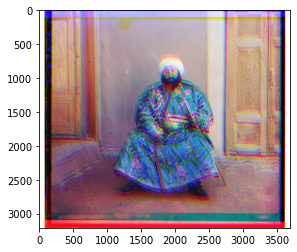

In [ ]:
# Naively combining them produces this result
h = im3.shape[0] // 3
output = np.stack((im3[2*h:3*h], im3[h:2*h], im3[:h]), -1)
plt.imshow(output)

Unlike the assignments found elsewhere that we adapted from (e.g., from Berkeley), you will come up with your own algorithm to align these images. A standard approach would be to first take a channel pair and try shifting one channel across another to find the best aligned image. To evaluate how well the channels aligned, one can use a standard metric such as SSD, or the Sum of Squared Differences, which simply measures the pixel-wise L2 difference between the two input channels. However, like what we've seen in Lecture 2, each of the RGB channels, when converted to greyscale, may not have the same intensity, resulting in a wrong image matching.

For this assignment, you will
1. Improve the SSD matching metric that can handle this scenario better. You may still use SSD as part of your metric or switch to a different metric altogether. You may write vectorized code. Google for ideas and implement existing prior work is okay. But no Google for code.
2. Speed up the search process. Shifting by one pixel at a time is slow but is necessary to get a good alignment. Limiting the search range could help somewhat but would still be slow for large images. One idea that can be implemented is a coarse-to-fine scheme where we operate on down-sampled images first. In particular, we can downsample the image to 1/2, 1/4, 1/8, ... versions, and compute the best parameters for the smallest version, transfer the best shifting paramereters to the bigger level, and continue on up to the original size. You're allowed to use cv2.resize(), cv2.GaussianBlur(), but no library for computing the image matching metric. If in doubt, please ask.



In [ ]:
# TODO [5/5]: Write your code here


**WRITEUP** [2/2]
1. Show all your aligned results on 11 images.
2. Explain your algorithm and justify why it is better than SSD. Any limitations?
3. State the run-time complexity of your algorithm using the Big-O notation.
4. Explain what you've learned and any obstacles you had.